**Introduction.**

`'KL'-divergence` (or `Kullback-Leibler` divergence) between 2 probability distributions of $P$ from $Q$ is defined as

$$ d_{KL} \left( P \Vert Q \right) = \int \log \left( \frac{dP}{dQ} \right) d P $$

In the `discreate-form`, we can rewrite the above formula as

$$ d_{KL} \left( P \Vert Q \right) = \sum_{k=1}^n \log \left( \frac{p(x_k)}{q(x_k)} \right) p(x_k). $$

The Kullback–Leibler divergence is `defined (exists)` only if for all ${\displaystyle x},$ then $P$ is absolutely continuous with respect to $Q;$ that meant $Q(x) = 0$ implies $P(x) = 0$, or $P \ll Q$. Moreover, $d_{KL} \left( P \Vert Q \right) = 0$ if $P(x) = Q(x), \; \forall x.$ 

Otherwise,  

$$ d_{KL} \left( P \Vert Q \right) = \infty, \quad $$
if $P$ is not absolutely continuous w.r.t. to $Q$.

In [1]:
import numpy as np
import scipy.stats as sst
import seaborn as sns
import matplotlib.pyplot as plt

**`Example.`** `Approximate the KL-divergence of` $\mathcal{N}(0, 1)$ from $\mathcal{N}(\mu, 1)$ for all $\mu \in \mathbb{R}$

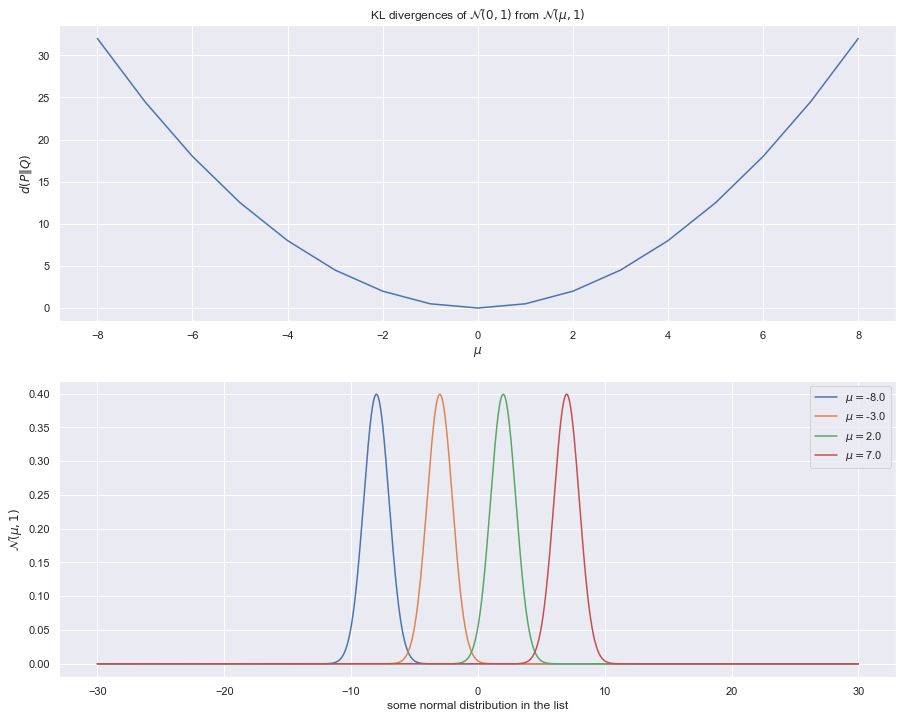

In [2]:
## Define a function of the approximation for KL-divergence by using the availabel function on scipy.stats. 
## we will discuss this function in the next section in this file.
def kl_divergence(p, q):
    return sst.entropy(p, q)

# Let the partitions = 201 points.
n_pat = 201
a, b = -30, 30
x = np.arange(a, b, 1/n_pat)

## Fix p to the random-variables generated by the standard-normal distribution
p = sst.norm.pdf(x, 0, 1)

## Initialize the KL-divergence of P from Q
dPQ = []

## Create the array of the mean of the normal distributions's sequence
muy = np.linspace(-8, 8, 17)
for mu in muy:
    qk = sst.norm.pdf(x, mu, 1)
    dPQ.append(kl_divergence(p, qk))

## Set the size of figure    
sns.set(rc = {"figure.figsize" : (15, 12)})

## Show the d_KL on the top of the figure
plt.subplot(211)    
plt.plot(muy, dPQ)

## Add the title and labels
plt.title('KL divergences of $\mathcal{N}(0,1)$ from $\mathcal{N}(\mu, 1)$')
plt.ylabel('$d(P \Vert Q)$')
plt.xlabel('$\mu$')

## Show a few distributions in the normal distribution sequences N(mu_k, 1)
plt.subplot(212)
for mu in muy[::5]:
    plt.plot(x, sst.norm.pdf(x, mu, 1), label = '$\mu = $'+str(mu))
    plt.legend(loc = 'upper right')

## Add the x,y_labels    
plt.ylabel('$\mathcal{N}(\mu, 1)$')
plt.xlabel('some normal distribution in the list')
plt.show()

**`Comment / intuition:`** The KL-divergences $d_{KL}(P \Vert Q)$ looks like a parabol when the normal distributions take the same variance.

**`Explain the intuition`**

Let $\phi(\mu, \sigma)$ be the density of $\mathcal{N}(\mu, \sigma)$ and $\Vert f - g \Vert_{L^2}^2 \triangleq \displaystyle \int (f(t) - g(t))^2 dt$, then

$i) \; \displaystyle{ d_{KL}\left( \phi(0, 1) \Vert \phi(t, 1) \right) = \dfrac{t^2}{2}, \quad \forall t \in \mathbb{R} }$

$ii) \; \displaystyle \Vert \phi(t, 1) - \phi(0, 1) \Vert_{L^2} \leq \dfrac{t^2}{2}, \quad \forall t \in \mathbb{R}$

$iii) \; \displaystyle{ d_{KL}\left( \phi(\mu_1, \sigma_1) \Vert \phi(\mu_2, \sigma_2) \right) = \dfrac{\sigma_1^2 - \sigma_2^2 + (\mu_1 - \mu_2)^2}{2 \sigma_2^2} + \log \dfrac{\sigma_1}{\sigma_2}, \quad \forall \mu_1, \mu_2 \in \mathbb{R} }$ and $\forall \sigma_1, \sigma_2 > 0$

**2. Entropy, cross-entropy via KL-divergences**

We have these formulas:

**2.1. Entropy of the information X**
$$ \displaystyle H(p) = \mathbb{E}(I(X)) = -\sum_{i=1}^n p_i \log(x_i),$$ 
where $p=(p_i)_i$ and $p_i = p(x_i)$ is the probability of that $x = x_i$, (remember that $p_i \in [0, 1]$ and $\sum_{i=1}^n p_i = 1).$

**2.2. Cross-entropy**
$$ H(p, q) = H(p) + d_{KL}(p \Vert q)$$

**The available function `entropy` in `scipy.stats`**

See: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.entropy.html

**Entropy example.** Imagine that we have an unfair coin which, when flipped, has a 99% chance of landing heads and only 1% chance of landing tails. 

Then p = [0.99, 0.01] and 
$$H(p) = -\left[ 0.99 \log(0.99) + 0.01 \log(0.01) \right] \approx 0.056$$

Now, let's see how it works on scipy.stats

In [3]:
p = [0.99, 0.01]
Hp = sst.entropy(p)
print('H(p) =\t \t' + str(Hp))
print('Check again: \t'+ str(-(0.99*np.log(0.99) + 0.01*np.log(0.01))))

H(p) =	 	0.056001534354847345
Check again: 	0.056001534354847345


One thing to note; if we are dealing with information expressed in `bits` (i.e. each `bit` is either 0 or 1) the logarithm has a base of 2, then
$$H(p) = -\left[ 0.99 \log_2(0.99) + 0.01 \log_2(0.01) \right] \approx 0.08$$

So, in `scipy.stats`; we must choose `base = 2` in `entropy(....)`. Let's check this again

In [4]:
Hp2 = sst.entropy(p, base = 2)
print('H_2(p) =\t\t' + str(Hp2))
print('check again: \t'+ str(-(0.99*np.log2(0.99) + 0.01*np.log2(0.01))))

H_2(p) =		0.08079313589591118
check again: 	0.08079313589591118


**Cross-entropy example.**

In the syntax `scipy.stats.entropy(p_k, q_k, base, axis)`, they conclude that if `qk != None` then compute the Kullback-Leibler divergence S = sum(pk * log(pk / qk), axis=axis); this meant the `cross-entropy` will be define as

`H(p, q) = entropy(p_k) + entropy(p_k, q_k)`

In [5]:
## values of true distribution
p = [0.1, 0.2, 0.2, 0.3, 0.2]
## values of the prediction
q = [0.12, 0.28, 0.25, 0.2 ,0.15]
## cross-entropy
sst.entropy(p, q) + sst.entropy(p)

1.6061337317139712

**3. Another examples of KL-divergences.** :)

In [6]:
## KL divergences between normal & exponential distribution
x = np.arange(0, 6, 0.01)
p = sst.norm.pdf(x, 0, 1)
q = sst.expon.pdf(x, 1)
sst.entropy(p, q), sst.entropy(q, p)

(inf, 1.608009725791487)

**Explain.** Let $p = \mathcal{N}(0, 1)$ and $q = \mathcal{E}(1)$, then
$$d_{KL}(q \Vert p) = \sqrt{2\pi} \int_0^{\infty} \left( \frac{x^2 - 2x}{2} \right) e^{-x} dx \approx 1.608$$
is well-defined, while
$$d_{KL}(p \Vert q) = \infty $$
since $p$ is not absolutely continuous w.r.t to $q.$ Indeed,
$$q(x) = \left \lbrace \begin{array}{ll} e^{-x} & \text{ if } x \geq 0 \\ 0 & \text{ otherwise } \end{array} \right. \text{ and } p(x) = \frac{1}{\sqrt{2\pi}} e^{-x^2/2},$$
take $A = (-1, 0) \in \mathcal{B}(\mathbb{R})$ then
$$Q(A) = \int_A q(x) dx = 0$$
but
$$P(A) =\int_A p(x) dx \approx 0.3413 \neq 0$$

In [7]:
## Calculate P(A) by using the c.d.f of N(0, 1) on (-1, 0)
sst.norm.cdf(0) - sst.norm.cdf(-1)

0.3413447460685429

`KL divergence between 2 Bernoulli distributions` $B(1, p)$ `and` $B(1, q).$

It is easy to verify that
$$ d_{KL}(p \Vert q) = p \log\left( \frac{p}{q} \right) + (1 - p) \log \left( \frac{1-p}{1-q} \right) $$
while
$$ d_{KL}(q \Vert p) = q \log\left( \frac{q}{p} \right) + (1 - q) \log \left( \frac{1-q}{1-p} \right) $$

In the following example, we take $p \sim B(1, 0.05)$ and $q \sim B(1, 0.99)$

In [8]:
p, q = 0.05, 0.99
P = sst.bernoulli.cdf(k = [0, 1], loc = 0, p = p)
Q = sst.bernoulli.cdf(k = [0, 1], loc = 0, p = q)
print(sst.entropy(P, Q), sst.entropy(Q, P))

1.560676367005981 0.6127911517066402


**Summary**

- 1) The `KL` divergences is not a distance since it is not symmetric.
- 2) But $d_{KL}(p \Vert q) \geq 0$, indeed
$$ d_{KL}(p \Vert q) = \int_{ \lbrace pq > 0 \rbrace}  p \log \left( \frac{p}{q} \right) = - 2\int_{ \lbrace pq > 0 \rbrace}  p \log \left( \sqrt{ \frac{q}{p} } - 1 + 1 \right) \geq -2 \int_{ \lbrace pq > 0 \rbrace}  p \left( \sqrt{ \frac{q}{p} } - 1 \right) = \int_{ \lbrace pq > 0 \rbrace} \left( \sqrt{p} - \sqrt{q} \right)^2 $$
- 3) The `JS` (or Jensen-Shannon) distance, is the symmetrized version of $d_{KL}$ defined as
$$ d_{JS}(p, q) = \frac{1}{2} \left( d_{KL}\left(p \left \Vert \frac{p+q}{2} \right. \right) + d_{KL}\left( q \left \Vert \frac{p+q}{2} \right. \right) \right) $$